### Logistic Regression

    逻辑回归用来处理分类问题，像线性回归模型一样，逻辑回归模型也计算各个输入属性的参数权重之和，但是不同的是，输出这个值得逻辑值。
    主要形式可以表现为：

$P = h^w(x) = \sigma(w^Tx)$

其中：
    $\sigma(t) = \frac{1}{1 + e^{-t}}$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

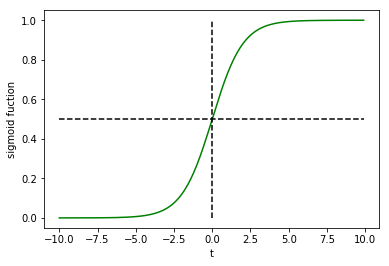

In [17]:
t = np.arange(-10,10,0.1)
y = 1 / (1 + np.exp(-t))
x = np.zeros(200)
y2 = np.array([0.5]*200)
fig = plt.figure()
plt.plot(t,y,'g-')
plt.plot(x,y,'k--')
plt.plot(t,y2,'k--')
plt.ylabel("sigmoid fuction")
plt.xlabel("t")

可以发现，当$w^Tx$ > 0 时，0.5 < $h_w(x)$ < 1,  
当$w^Tx$ < 0时，0 < $h_w(x)$ < 0.5  

因此可以判定$w^Tx$ > 0 时，$h_w(x)$ 取得1，相反取得0获得分类效果。

在线性回归问题中，通过定义代价函数（MES）来拟合参数的优化，逻辑回归也可以定义代价函数，思路是：  
希望获得这样的效果，输出模型的对于分类{1，0}的概率，当实际分类为1时，模型预测为1的误差最低，概率最高，而预测为0的误差随着$h_w(x)$的变小而增大；当实际分类为0时，使得模型预测为0的误差最底，预测为1的误差随着$h_w(x)$的变大而增大。

由上思路得到下面单个样本的代价函数：  
$ f(x)=\left\{
\begin{aligned}
-log(h_w(x))&  & if: y=1 \\
-log(1 - h_w(x))&  &if: y=0
\end{aligned}
\right.
$

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


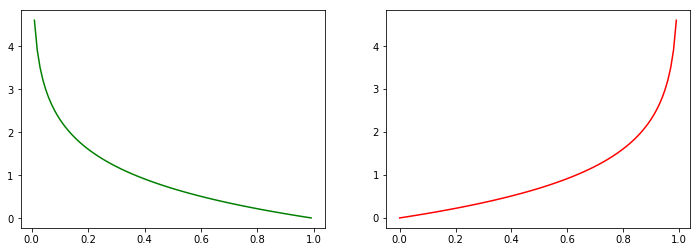

In [24]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
x = np.arange(0,1,0.01)
y1 = -np.log(x)
y2 = -np.log(1-x)
saxis1.plot(x,y1,'g-')
saxis2.plot(x,y2,'r-')

假定：x:n*m,y:n*1,w:m*1,将两个函数合并就可以得到逻辑回归的代价函数：  
$J(w) = - \frac{1}{n}\sum_{i=1}^n(y_i*log(h_w(x)+(1-y_i)log(1-h_w(x))))$

有个代价函数就可以用梯度下降算法等其他计算方法进行w优化:  
Repeat Until Convergence {    
    $w_j = w_j - \frac{\alpha}{n}\sum_{i=1}{n}(h_w(x_i) - y_i)*x_i^j$  
    (simultaneously update all)  
}

逻辑回归也可以用l1或l2惩戒式来正则化：  
$J(w) = -(\frac{1}{n}\sum_{i=1}{n}y_i*h_w(x_i)+(1-y_i)log(1-h_x(x_i)))+\frac{\lambda}{2m}\sum_{j=1}^mw_j^2$

梯度下降算法：  
Repeat Until Convergence {    
    $w_0 = w_0 - \frac{\alpha}{n}\sum_{i=1}{n}(h_w(x_i) - y_i)*x_0$  
    $w_j = w_j - \frac{\alpha}{n}\sum_{i=1}{n}(h_w(x_i) - y_i)*x_i^j + \frac{\lambda}{m}w_j$ for i=1,2,3,...m  
    (simultaneously update all)  
}

在sklearn中有对应的模块


In [25]:
from sklearn.linear_model import LogisticRegression

```
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’liblinear’, max_iter=100, multi_class=’ovr’, verbose=0, warm_start=False, n_jobs=1)   
```
penalty 正则化惩戒方式：l2,l1
dual:双重性
C:正则化系数
